__Notebook Author__: Hamed Qazanfari  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hamedmit/machine-learning-and-neural-networks-course/blob/main/Session_08_CNN/Session_08_CNN.ipynb)
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/hamedmit/machine-learning-and-neural-networks-course/main/Session_08_CNN/Session_08_CNN.ipynb)

---

## 🔷 Session_08_CNN


# جلسه هشتم — شبکه های عصبی کانولوشن

## روی MNIST


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[..., None] / 255.0
X_test = X_test[..., None] / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.8973 - loss: 0.3318
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9844 - loss: 0.0509
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9891 - loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9922 - loss: 0.0246
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9942 - loss: 0.0175
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9862 - loss: 0.0422
Test accuracy: 0.9894999861717224


مثال ۲: CNN روی CIFAR-10 (نمایش قدرت واقعی)

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3731 - loss: 1.7222
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.5933 - loss: 1.1515
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6543 - loss: 0.9860
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.6859 - loss: 0.9011
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7120 - loss: 0.8253
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7302 - loss: 0.7740
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.7555 - loss: 0.7145
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7699 - loss: 0.6610
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7808 - loss: 0.6307
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.7955 - loss: 0.5914
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - ac

🧠 دیتاست Fashion-MNIST
چرا Fashion-MNIST؟

نسخه پیشرفته‌تر MNIST

تصاویر واقعی لباس‌ها

10 کلاس (کفش، تی‌شرت، شلوار، کیف، …)

تصویر 28×28 خاکستری

مستقیم داخل TensorFlow هست → بدون دانلود دستی ❗

📌 از نظر آموزشی:

«به جای عدد، تصویر واقعی داریم
و مدل یاد می‌گیرد لباس را تشخیص دهد»

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


📌 مرحله ۲: دانلود و آماده‌سازی دیتاست

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


📌 مرحله ۳: خواندن تصاویر

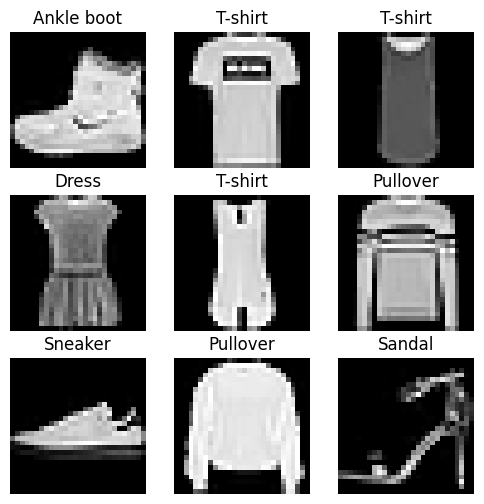

In [11]:
class_names = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


📌 مرحله ۴: ساخت مدل CNN ساده

In [12]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


📌 مرحله ۵: کامپایل و آموزش

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7425 - loss: 0.7164 - val_accuracy: 0.8595 - val_loss: 0.3850
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8697 - loss: 0.3644 - val_accuracy: 0.8788 - val_loss: 0.3313
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.8886 - loss: 0.3090 - val_accuracy: 0.8945 - val_loss: 0.3037
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9007 - loss: 0.2730 - val_accuracy: 0.8990 - val_loss: 0.2789
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9077 - loss: 0.2505 - val_accuracy: 0.8937 - val_loss: 0.2966


🖼️ تست با تصویر دلخواه
📌 آپلود تصویر

In [39]:
from google.colab import files
uploaded = files.upload()


Saving download.webp to download.webp


📌 پیش‌بینی تصویر

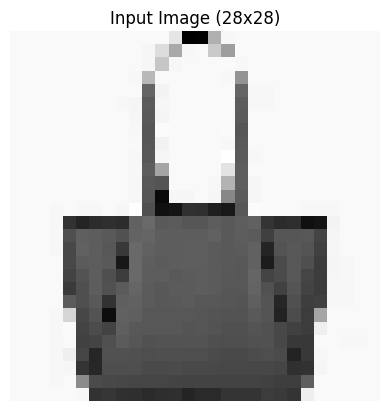

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# خواندن تصویر
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)

# تبدیل به grayscale (چون Fashion-MNIST خاکستری است)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# تغییر اندازه به 28×28
img_resized = cv2.resize(img_gray, (28, 28))

# نرمال‌سازی (دقیقاً مثل دیتاست)
img_normalized = img_resized / 255.0

# اضافه کردن بعد batch و channel
img_input = img_normalized[np.newaxis, ..., np.newaxis]

plt.imshow(img_resized, cmap='gray')
plt.title("Input Image (28x28)")
plt.axis('off')
plt.show()


In [41]:
prediction = model.predict(img_input)

predicted_class = np.argmax(prediction)
confidence = np.max(prediction)
class_names = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Predicted class:", class_names[predicted_class])
print("Confidence:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted class: Bag
Confidence: 0.7096883
